In [1]:
import pandas as pd
import numpy as np
import flip_data
import gd_poisoner
import datetime

# Import Training, Testing and Validating Set

In [2]:
poi_train_x = pd.read_csv('train_X.csv')
poi_train_x = np.matrix(poi_train_x.to_numpy())
poi_train_y = pd.read_csv('train_y.csv')
poi_train_y = poi_train_y['Life Expectancy'].tolist()
poi_test_x = pd.read_csv('test_X.csv')
poi_test_x = np.matrix(poi_test_x.to_numpy())
poi_test_y = pd.read_csv('test_y.csv')
poi_test_y = poi_test_y['Life Expectancy'].tolist()
poi_val_x = pd.read_csv('val_X.csv')
poi_val_x = np.matrix(poi_val_x.to_numpy())
poi_val_y = pd.read_csv('val_y.csv')
poi_val_y = poi_val_y['Life Expectancy'].tolist()

In [3]:
# num of max poisoning points, max 20% poison rate
poison_ct = 328
# num of points to train model
train_ct = len(poi_train_x)
test_ct = len(poi_test_x)
# proportion of poisoning
total_prop = poison_ct / (poison_ct + train_ct)
print ("Posion count: ", poison_ct, " Train count: ", train_ct, " Test count: ", test_ct, " Proportion of poisoning: ", total_prop)

Posion count:  328  Train count:  1319  Test count:  165  Proportion of poisoning:  0.19914996964177292


# Inverse Flip and Linear Reg Poisoner

classifier:  LinearRegression()


*****************************
**** Poison Count:  54  ****
*****************************
Iteration  0 
Objective Value:  0.006481581327500948  Change:  0.006481581327500948
Validation MSE  0.005045050585645173 
Test MSE  0.006879177254013085
 
Iteration  1
Objective Value: 0.004699956088896263  Difference:  -0.0017816252386046857
NO PROGRESS MADE!
 
Iteration  2
Objective Value: 0.0047024928004696445  Difference:  -0.0017790885270313039
NO PROGRESS MADE!
 
Iteration  3
Objective Value: 0.0047047732026752895  Difference:  -0.0017768081248256589
NO PROGRESS MADE!
 
Iteration  4
Objective Value: 0.004706197698615774  Difference:  -0.0017753836288851741
NO PROGRESS MADE!
 
Iteration  5
Objective Value: 0.004707019702466236  Difference:  -0.0017745616250347124
NO PROGRESS MADE!
 
Iteration  6
Objective Value: 0.004707636683322053  Difference:  -0.0017739446441788955
NO PROGRESS MADE!
 
Iteration  7
Objective Value: 0.004708038195672752  Difference:  -0.0017

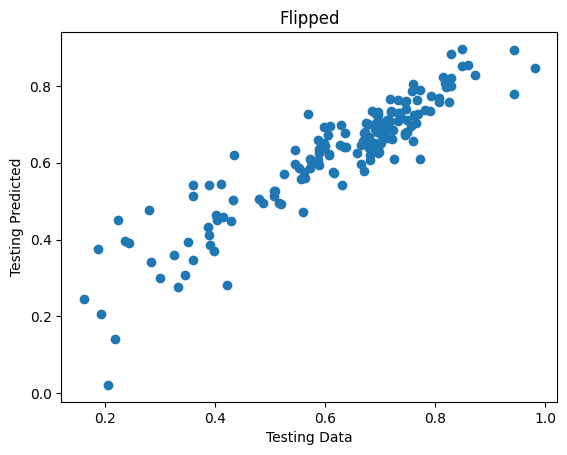

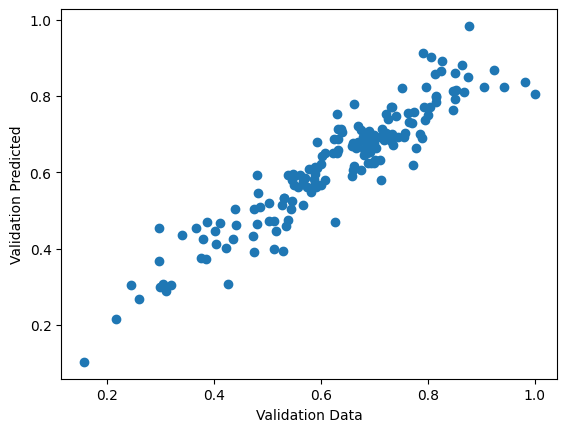

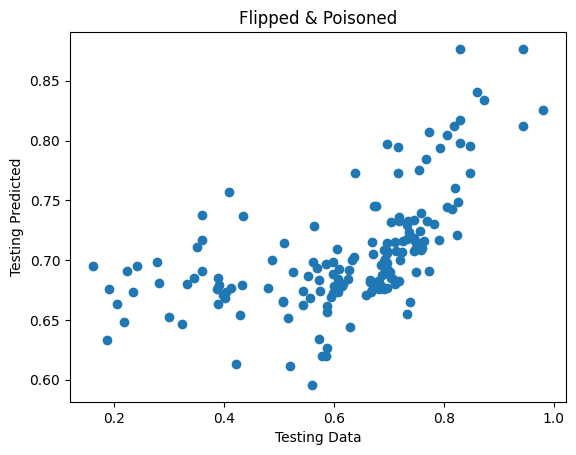

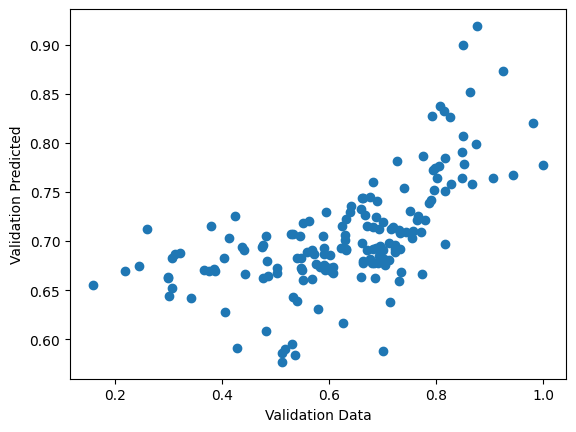


Poison Proportion:  19.91 %. Max reached, terminate

After Flipping, Unpoisoned 
 Validation MSE:  0.0035266882948545124 
 Test MSE: 0.00452093145874648

After Flipping & Poisoning:
 Validation MSE:  0.023993050222828056 
 Test MSE: 0.02850268413981893


In [4]:
# define parameters for poisoner
eta = 0.01 # gradient descent step size (note gradients are normalized)
beta = 0.05 # decay rate for line search
sigma = 0.9 # line search stop condition
epsilon = 1e-4 # poisoning stop condition
stop1 = 5
stop2 = 20
stop3 = 10
decrease_rate = 0.65

# flip the data
x_flip, y_flip = flip_data.flip_data.inverse_flip(poi_train_x,poi_train_y,poison_ct)

poiser = gd_poisoner.linear_poisoner(poi_train_x, poi_train_y, poi_test_x, poi_test_y, poi_val_x, poi_val_y, eta, beta, sigma, epsilon)
classifier, lam = poiser.learn_model(np.concatenate((poi_train_x, x_flip), axis=0), poi_train_y + y_flip, None)
print("classifier: ", classifier)
err = poiser.compute_error(classifier,False,False)[0]
x_flip = np.matrix(x_flip)
y_flip = y_flip[:]
"""
Evaluate the poisoning attack with the poison rate of 4%, 8%, 12%, 16%, 20%
"""
for i in  range(5):
    # calculate the amt of data that should be poisoned in this iteration
    current_prop = 0.2*(i + 1)*total_prop
    sample_amt = int(train_ct*(current_prop/(1 - current_prop)))
    current_x_pois = x_flip[:sample_amt,:]
    current_y_pois = y_flip[:sample_amt]
    # poison data
    x_pois_result, y_pois_result = poiser.poison_data(current_x_pois, current_y_pois,stop1, stop2, stop3, decrease_rate)
    #print(x_pois_result.shape,poi_train_x.shape)
    x_poised = np.concatenate((poi_train_x,x_pois_result),axis = 0)
    y_poised = poi_train_y + y_pois_result
    # train the model on poisoned data
    classifier_poised, lam = poiser.learn_model(x_poised,y_poised,None)
    print("Poisoned classifier: ", classifier_poised, ", \nReturned lambda: ", lam)
    classifier = poiser.init_classifier
    if i != 4:
        err_unpoised = poiser.compute_error(classifier,False,False)
        err = poiser.compute_error(classifier_poised,False,False)
        print("\nPoison Proportion: ", round(current_prop*100,2),"%")
    else:
        err_unpoised = poiser.compute_error(classifier,True,False)
        err = poiser.compute_error(classifier_poised,True,True)
        print("\nPoison Proportion: ", round(total_prop*100,2), "%. Max reached, terminate")
    print("\nAfter Flipping, Unpoisoned \n Validation MSE: ", err_unpoised[0], "\n Test MSE:", err_unpoised[1])
    print("\nAfter Flipping & Poisoning:\n Validation MSE: ", err[0], "\n Test MSE:", err[1])

# Perform B Flip and Linear Reg Poisoning

classifier:  LinearRegression()


*****************************
**** Poison Count:  54  ****
*****************************
Iteration  0 
Objective Value:  0.005459657103981641  Change:  0.005459657103981641
Validation MSE  0.004493123500047514 
Test MSE  0.005485840732287891
 
Iteration  1
Objective Value: 0.006150944571399296  Difference:  0.0006912874674176554
 
Iteration  2
Objective Value: 0.006069027643950146  Difference:  -8.191692744915005e-05
NO PROGRESS MADE!
 
Iteration  3
Objective Value: 0.00608110566469526  Difference:  -6.983890670403652e-05
NO PROGRESS MADE!
 
Iteration  4
Objective Value: 0.006110279541463878  Difference:  -4.066502993541835e-05
NO PROGRESS MADE!
 
Iteration  5
Objective Value: 0.00612880768207251  Difference:  -2.213688932678655e-05
NO PROGRESS MADE!
 
Poisoned classifier:  LinearRegression() , 
Returned lambda:  0

Poison Proportion:  3.98 %

After Flipping, Unpoisoned 
 Validation MSE:  0.0035266882948545124 
 Test MSE: 0.00452093145874648

After Fli

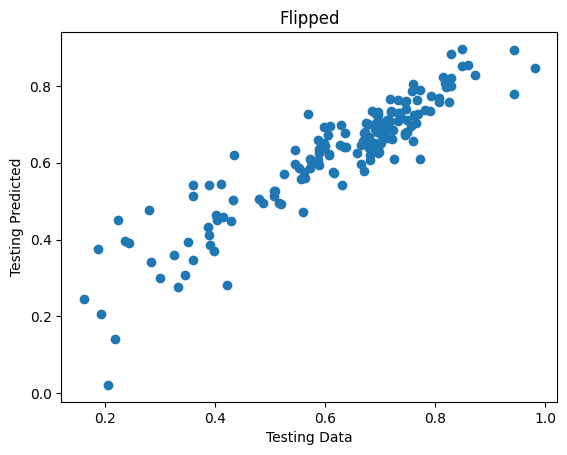

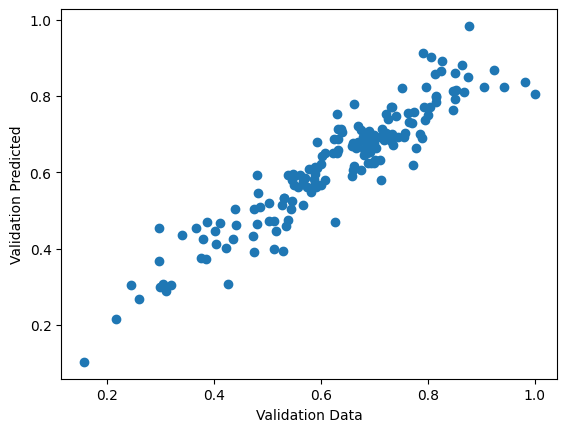

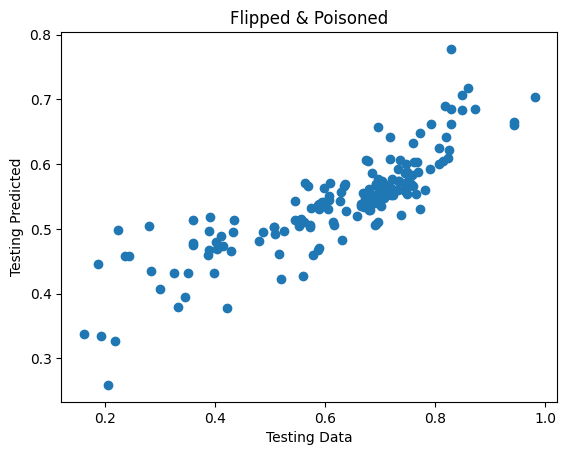

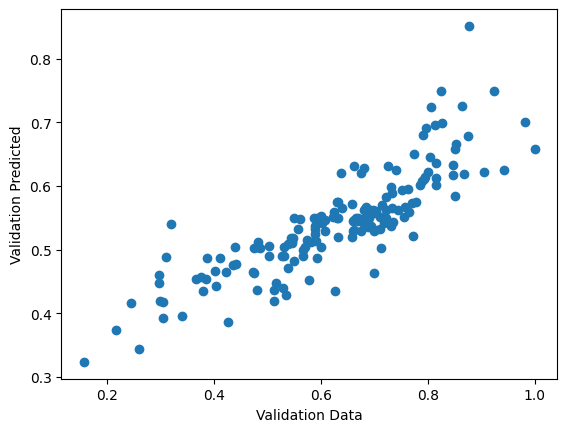


Poison Proportion:  19.91 %. Max reached, terminate

After Flipping, Unpoisoned 
 Validation MSE:  0.0035266882948545124 
 Test MSE: 0.00452093145874648

After Flipping & Poisoning:
 Validation MSE:  0.0182183075358276 
 Test MSE: 0.0191554685047699


In [5]:
# flip the data
x_flip, y_flip = flip_data.flip_data.B_flip(poi_train_x,poi_train_y,poison_ct)

poiser = gd_poisoner.linear_poisoner(poi_train_x, poi_train_y, poi_test_x, poi_test_y, poi_val_x, poi_val_y, eta, beta, sigma, epsilon)
classifier, lam = poiser.learn_model(np.concatenate((poi_train_x, x_flip), axis=0), poi_train_y + y_flip, None)
print("classifier: ", classifier)
err = poiser.compute_error(classifier,False,False)[0]
x_flip = np.matrix(x_flip)
y_flip = y_flip[:]
"""
Evaluate the poisoning attack with the poison rate of 4%, 8%, 12%, 16%, 20%
"""
for i in  range(5):
    # calculate the amt of data that should be poisoned in this iteration
    current_prop = 0.2*(i + 1)*total_prop
    sample_amt = int(train_ct*(current_prop/(1 - current_prop)))
    current_x_pois = x_flip[:sample_amt,:]
    current_y_pois = y_flip[:sample_amt]
    # poison data
    x_pois_result, y_pois_result = poiser.poison_data(current_x_pois, current_y_pois,stop1, stop2, stop3, decrease_rate)
    x_poised = np.concatenate((poi_train_x,x_pois_result),axis = 0)
    y_poised = poi_train_y + y_pois_result
    # train the model on poisoned data
    classifier_poised, lam = poiser.learn_model(x_poised,y_poised,None)
    print("Poisoned classifier: ", classifier_poised, ", \nReturned lambda: ", lam)
    classifier = poiser.init_classifier
    if i != 4:
        err_unpoised = poiser.compute_error(classifier,False,False)
        err = poiser.compute_error(classifier_poised,False,False)
        print("\nPoison Proportion: ", round(current_prop*100,2),"%")
    else:
        err_unpoised = poiser.compute_error(classifier,True,False)
        err = poiser.compute_error(classifier_poised,True,True)
        print("\nPoison Proportion: ", round(total_prop*100,2), "%. Max reached, terminate")
    print("\nAfter Flipping, Unpoisoned \n Validation MSE: ", err_unpoised[0], "\n Test MSE:", err_unpoised[1])
    print("\nAfter Flipping & Poisoning:\n Validation MSE: ", err[0], "\n Test MSE:", err[1])